<a href="https://colab.research.google.com/github/siim2mary/mkdir-my_projects/blob/main/A_Insurance_claim1prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Insurance** **Domain**

---



OBJECTIVE:- THE AIM OF THE PROJECT IS TO BUILT A PREDICTIVE MODEL FOR INSURANCE CLAIM PROBABILITY BASED ON COMPREHENSIVE CAR POLICY FEATURES AND SAFETY RATINGS


Load data

In [ ]:
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')
import sklearn


In [ ]:
df=pd.read_csv('/content/Insurance_Data.csv')

In [ ]:
df.head(20)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
5,ID00006,1.018709,0.07,0.519231,C6,13051,3,C2,M4,Diesel,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
6,ID00007,0.097992,0.16,0.403846,C7,6112,4,B2,M5,Diesel,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0
7,ID00008,0.509085,0.14,0.423077,C8,8794,1,B2,M6,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
8,ID00009,0.282394,0.07,0.298077,C7,6112,3,C2,M4,Diesel,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
9,ID00010,0.566255,0.04,0.442308,C9,17804,1,B2,M7,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0,0


In [ ]:
df.tail()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
58587,ID58588,0.355089,0.13,0.644231,C8,8794,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
58588,ID58589,1.199642,0.02,0.519231,C14,7788,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58589,ID58590,1.162273,0.05,0.451923,C5,34738,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58590,ID58591,1.236307,0.14,0.557692,C8,8794,1,B2,M6,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
58591,ID58592,0.124429,0.02,0.442308,C8,8794,3,C2,M4,Diesel,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0


In [ ]:
df.shape

(58592, 44)

Exploratory data Analysis(EDA)

---



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
policy_tenure,58592.0,0.611246,0.414156,0.002735,0.210250,0.573792,1.039104,1.396641
age_of_car,58592.0,0.069424,0.056721,0.000000,0.020000,0.060000,0.110000,1.000000
age_of_policyholder,58592.0,0.469420,0.122886,0.288462,0.365385,0.451923,0.548077,1.000000
population_density,58592.0,18826.858667,17660.174792,290.000000,6112.000000,8794.000000,27003.000000,73430.000000
make,58592.0,1.763722,1.136988,1.000000,1.000000,1.000000,3.000000,5.000000
airbags,58592.0,3.137066,1.832641,1.000000,2.000000,2.000000,6.000000,6.000000
displacement,58592.0,1162.355851,266.304786,796.000000,796.000000,1197.000000,1493.000000,1498.000000
cylinder,58592.0,3.626963,0.483616,3.000000,3.000000,4.000000,4.000000,4.000000
gear_box,58592.0,5.245443,0.430353,5.000000,5.000000,5.000000,5.000000,6.000000
turning_radius,58592.0,4.852893,0.228061,4.500000,4.600000,4.800000,5.000000,5.200000


In [ ]:
df.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [ ]:
# applying the method TO FIND IF NAN values are ther
nan_in_df = df.isnull().sum().sum()
print('Number of NaN values present: ' + str(nan_in_df))


Number of NaN values present: 0


In [ ]:
df.dtypes

policy_id                            object
policy_tenure                       float64
age_of_car                          float64
age_of_policyholder                 float64
area_cluster                         object
population_density                    int64
make                                  int64
segment                              object
model                                object
fuel_type                            object
max_torque                           object
max_power                            object
engine_type                          object
airbags                               int64
is_esc                               object
is_adjustable_steering               object
is_tpms                              object
is_parking_sensors                   object
is_parking_camera                    object
rear_brakes_type                     object
displacement                          int64
cylinder                              int64
transmission_type               

In [ ]:
df.nunique()

policy_id                           58592
policy_tenure                       58592
age_of_car                             49
age_of_policyholder                    75
area_cluster                           22
population_density                     22
make                                    5
segment                                 6
model                                  11
fuel_type                               3
max_torque                              9
max_power                               9
engine_type                            11
airbags                                 3
is_esc                                  2
is_adjustable_steering                  2
is_tpms                                 2
is_parking_sensors                      2
is_parking_camera                       2
rear_brakes_type                        2
displacement                            9
cylinder                                2
transmission_type                       2
gear_box                          

In [ ]:
df.drop("policy_tenure", axis =1,inplace = True)

In [ ]:
df.head(3)

,policy_id,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0


In [ ]:
df.max_power.unique()

array(['40.36bhp@6000rpm', '88.50bhp@6000rpm', '67.06bhp@5500rpm',
       '113.45bhp@4000rpm', '88.77bhp@4000rpm', '55.92bhp@5300rpm',
       '97.89bhp@3600rpm', '61.68bhp@6000rpm', '118.36bhp@5500rpm'],
      dtype=object)

In [ ]:
df.sort_values("displacement",ascending = False).head(10)

,policy_id,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
45288,ID45289,0.09,0.317308,C2,27003,5,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
47325,ID47326,0.08,0.432692,C15,290,5,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
31409,ID31410,0.17,0.461538,C10,73430,5,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
31410,ID31411,0.12,0.326923,C2,27003,5,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
42422,ID42423,0.18,0.500000,C2,27003,5,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
19774,ID19775,0.15,0.548077,C5,34738,5,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
49885,ID49886,0.10,0.480769,C2,27003,5,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
52116,ID52117,0.09,0.355769,C6,13051,5,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
39247,ID39248,0.07,0.317308,C10,73430,5,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
55623,ID55624,0.05,0.307692,C2,27003,5,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0


In [ ]:
df.groupby("segment")[["displacement", "is_claim"]].describe().T

segment                        A           B1            B2           C1  \
displacement count  17321.000000  4173.000000  18314.000000  3557.000000   
             mean     823.811270   998.000000   1223.176695  1376.094743   
             std       69.803312     0.000000     84.665109   147.572646   
             min      796.000000   998.000000   1197.000000  1197.000000   
             25%      796.000000   998.000000   1197.000000  1197.000000   
             50%      796.000000   998.000000   1197.000000  1498.000000   
             75%      796.000000   998.000000   1197.000000  1498.000000   
             max      999.000000   998.000000   1497.000000  1498.000000   
is_claim     count  17321.000000  4173.000000  18314.000000  3557.000000   
             mean       0.060389     0.058471      0.068581     0.064099   
             std        0.238213     0.234660      0.252748     0.244964   
             min        0.000000     0.000000      0.000000     0.000000   
             25%        0.000000     0.000000      0.000000     0.000000   
             50%        0.000000     0.000000      0.000000     0.000000   
             75%        0.000000     0.000000      0.000000     0.000000   
             max        1.000000     1.000000      1.000000     1.000000   

segment                       C2      Utility  
displacement count  14018.000000  1209.000000  
             mean    1493.000000  1196.000000  
             std        0.000000     0.000000  
             min     1493.000000  1196.000000  
             25%     1493.000000  1196.000000  
             50%     1493.000000  1196.000000  
             75%     1493.000000  1196.000000  
             max     1493.000000  1196.000000  
is_claim     count  14018.000000  1209.000000  
             mean       0.064275     0.060380  
             std        0.245250     0.238289  
             min        0.000000     0.000000  
             25%        0.000000     0.000000  
             50%        0.000000     0.000000  
             75%        0.000000     0.000000  
             max        1.000000     1.000000

To access the catagorical variables

---



In [ ]:
for i in df.select_dtypes("object"):
  print(df[i].value_counts())
  print("*********"*15)

ID00001    1
ID39053    1
ID39055    1
ID39056    1
ID39057    1
          ..
ID19535    1
ID19536    1
ID19537    1
ID19538    1
ID58592    1
Name: policy_id, Length: 58592, dtype: int64
***************************************************************************************************************************************
C8     13654
C2      7342
C5      6979
C3      6101
C14     3660
C13     3423
C10     3155
C9      2734
C7      2167
C12     1589
C1      1468
C11     1212
C19      952
C6       890
C15      771
C4       665
C17      492
C16      401
C21      379
C18      242
C22      207
C20      109
Name: area_cluster, dtype: int64
***************************************************************************************************************************************
B2         18314
A          17321
C2         14018
B1          4173
C1          3557
Utility     1209
Name: segment, dtype: int64
*******************************************************************************************

the max of population density is 73430.00 we are assigning it to all population density

In [ ]:
df[df.population_density == 73430]

,policy_id,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
13,ID00014,0.10,0.307692,C10,73430,1,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
33,ID00034,0.15,0.480769,C10,73430,1,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
71,ID00072,0.04,0.615385,C10,73430,1,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
77,ID00078,0.13,0.384615,C10,73430,3,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
82,ID00083,0.13,0.403846,C10,73430,1,B1,M8,CNG,82.1Nm@3400rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58510,ID58511,0.10,0.394231,C10,73430,1,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
58512,ID58513,0.07,0.509615,C10,73430,1,B1,M8,CNG,82.1Nm@3400rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,2,0
58557,ID58558,0.18,0.519231,C10,73430,1,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
58561,ID58562,0.04,0.326923,C10,73430,1,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0


In [ ]:
df.isnull().sum()

policy_id                           0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length                              0
width       

In [ ]:
categ_list =[]
numer_list = []

for i in df.columns:
  unique_value = len(df[i].unique())

  if unique_value<20:
    categ_list.append(i)

  else:
    numer_list.append(i)

In [ ]:
categ_list

['make',
 'segment',
 'model',
 'fuel_type',
 'max_torque',
 'max_power',
 'engine_type',
 'airbags',
 'is_esc',
 'is_adjustable_steering',
 'is_tpms',
 'is_parking_sensors',
 'is_parking_camera',
 'rear_brakes_type',
 'displacement',
 'cylinder',
 'transmission_type',
 'gear_box',
 'steering_type',
 'turning_radius',
 'length',
 'width',
 'height',
 'gross_weight',
 'is_front_fog_lights',
 'is_rear_window_wiper',
 'is_rear_window_washer',
 'is_rear_window_defogger',
 'is_brake_assist',
 'is_power_door_locks',
 'is_central_locking',
 'is_power_steering',
 'is_driver_seat_height_adjustable',
 'is_day_night_rear_view_mirror',
 'is_ecw',
 'is_speed_alert',
 'ncap_rating',
 'is_claim']

In [ ]:
numer_list

['policy_id',
 'age_of_car',
 'age_of_policyholder',
 'area_cluster',
 'population_density']

To consider only this numerical values

In [ ]:
df.loc[:,numer_list]

,policy_id,age_of_car,age_of_policyholder,area_cluster,population_density
0,ID00001,0.05,0.644231,C1,4990
1,ID00002,0.02,0.375000,C2,27003
2,ID00003,0.02,0.384615,C3,4076
3,ID00004,0.11,0.432692,C4,21622
4,ID00005,0.11,0.634615,C5,34738
...,...,...,...,...,...
58587,ID58588,0.13,0.644231,C8,8794
58588,ID58589,0.02,0.519231,C14,7788
58589,ID58590,0.05,0.451923,C5,34738
58590,ID58591,0.14,0.557692,C8,8794


Here area cluster is not a numerical value so we drop it from numer list

In [ ]:
numer_list.remove("area_cluster")

In [ ]:
numer_list

['policy_id', 'age_of_car', 'age_of_policyholder', 'population_density']

In [ ]:
df.loc[:,numer_list].head(3)

,policy_id,age_of_car,age_of_policyholder,population_density
0,ID00001,0.05,0.644231,4990
1,ID00002,0.02,0.375000,27003
2,ID00003,0.02,0.384615,4076


we add area_cluster to cater

In [ ]:
categ_list.append("area_cluster")

In [ ]:
categ_list

['make',
 'segment',
 'model',
 'fuel_type',
 'max_torque',
 'max_power',
 'engine_type',
 'airbags',
 'is_esc',
 'is_adjustable_steering',
 'is_tpms',
 'is_parking_sensors',
 'is_parking_camera',
 'rear_brakes_type',
 'displacement',
 'cylinder',
 'transmission_type',
 'gear_box',
 'steering_type',
 'turning_radius',
 'length',
 'width',
 'height',
 'gross_weight',
 'is_front_fog_lights',
 'is_rear_window_wiper',
 'is_rear_window_washer',
 'is_rear_window_defogger',
 'is_brake_assist',
 'is_power_door_locks',
 'is_central_locking',
 'is_power_steering',
 'is_driver_seat_height_adjustable',
 'is_day_night_rear_view_mirror',
 'is_ecw',
 'is_speed_alert',
 'ncap_rating',
 'is_claim',
 'area_cluster']

In [ ]:
df.loc[:,categ_list].head(3)

,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,...,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,area_cluster
0,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,...,No,No,Yes,No,No,No,Yes,0,0,C1
1,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,...,No,No,Yes,No,No,No,Yes,0,0,C2
2,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,...,No,No,Yes,No,No,No,Yes,0,0,C3


In [ ]:
df.loc[:,numer_list].describe().T

,count,mean,std,min,25%,50%,75%,max
age_of_car,58592.0,0.069424,0.056721,0.000000,0.020000,0.060000,0.110000,1.0
age_of_policyholder,58592.0,0.469420,0.122886,0.288462,0.365385,0.451923,0.548077,1.0
population_density,58592.0,18826.858667,17660.174792,290.000000,6112.000000,8794.000000,27003.000000,73430.0


Data Visualisation

---



numerical data visualisation

In [ ]:
#k=1
#plt.figure(figsize=(12,12))
#plt.tight_layout()
##plt.suptitle("distribution of numerical values")


#for i in df.loc[:,numer_list]:
    #plt.subplot(2,2,k)
    #sns.distplot(df[i])
    #plt.title(i)
    #k+=1

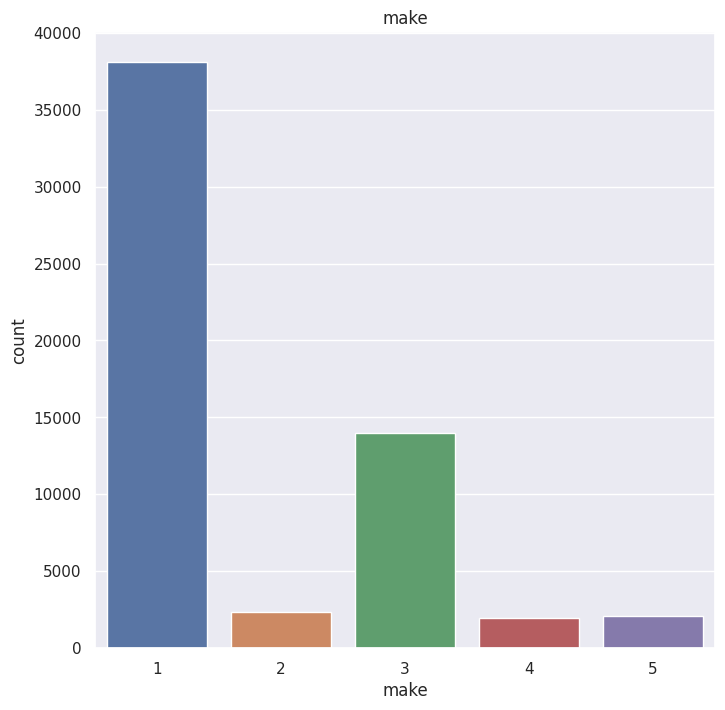

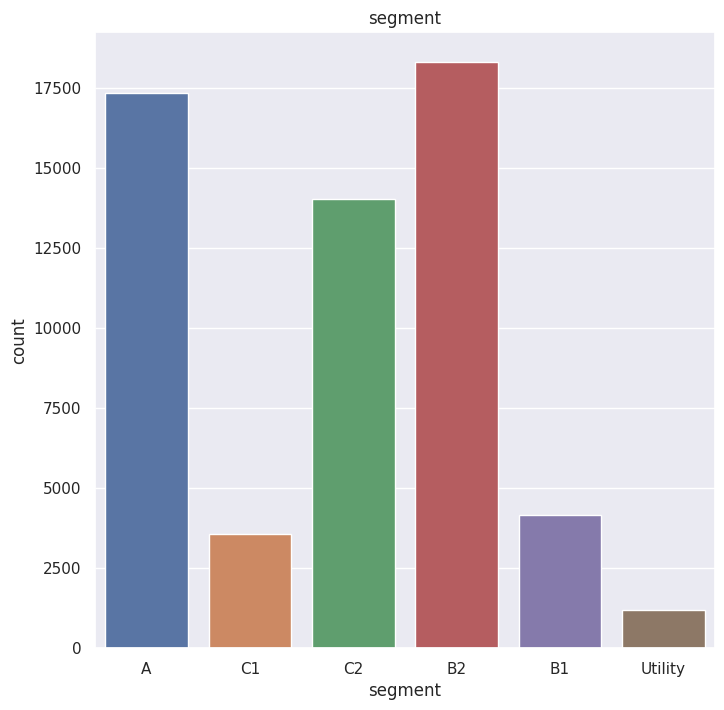

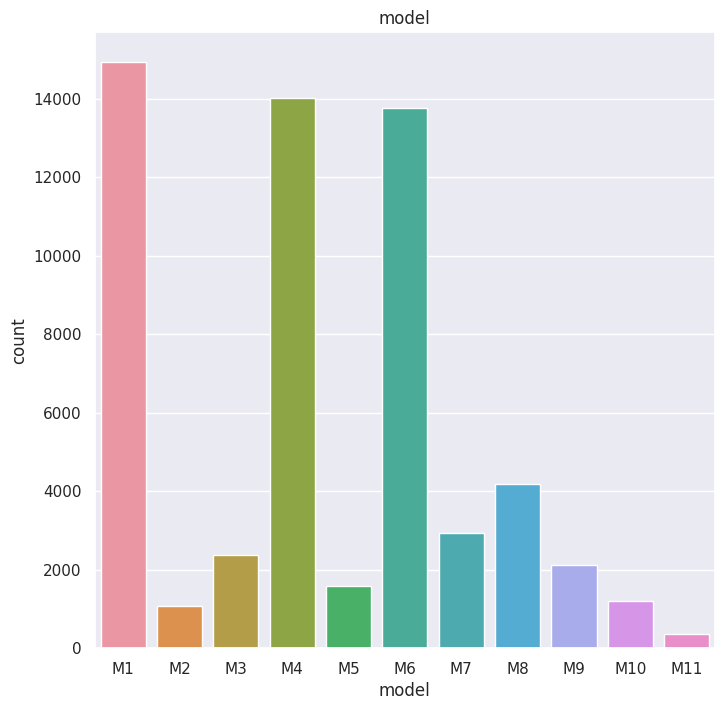

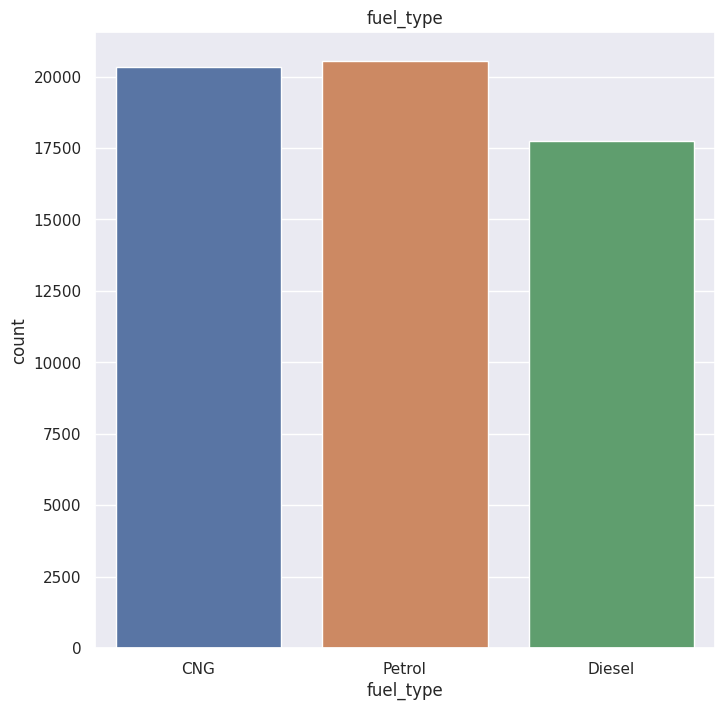

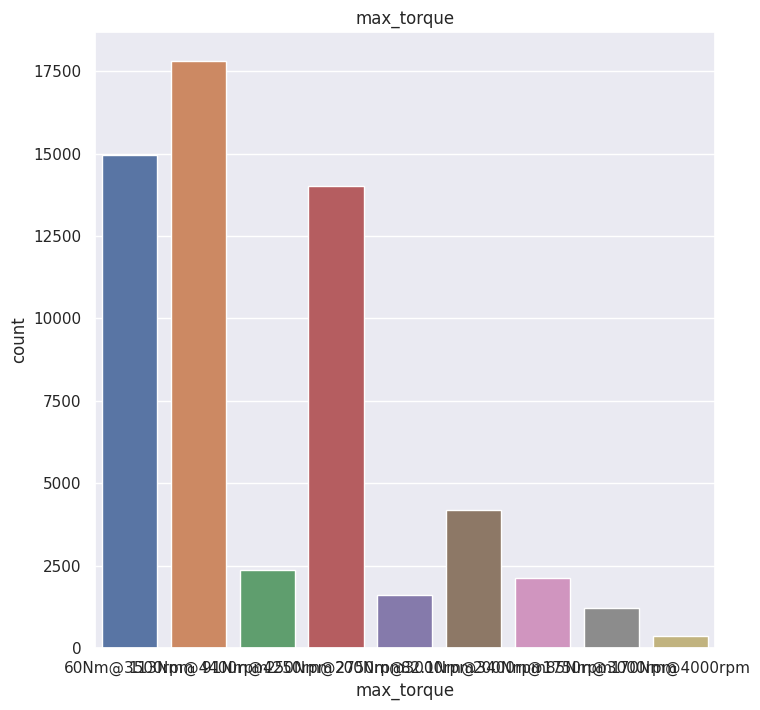

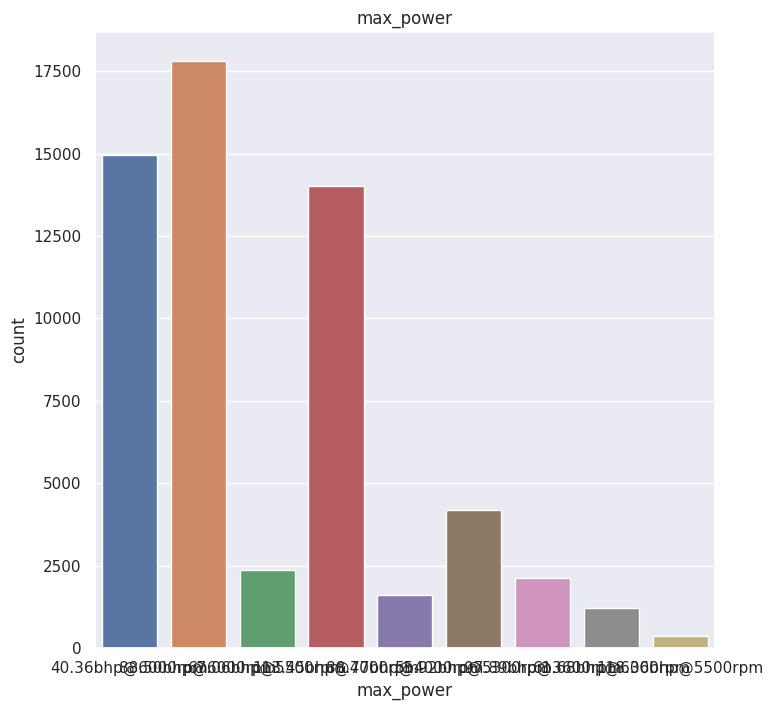

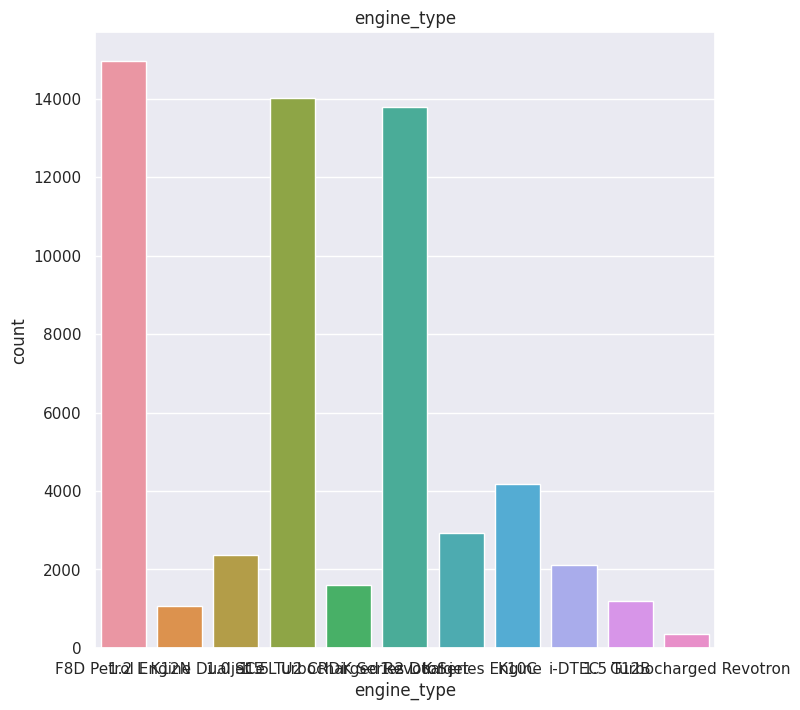

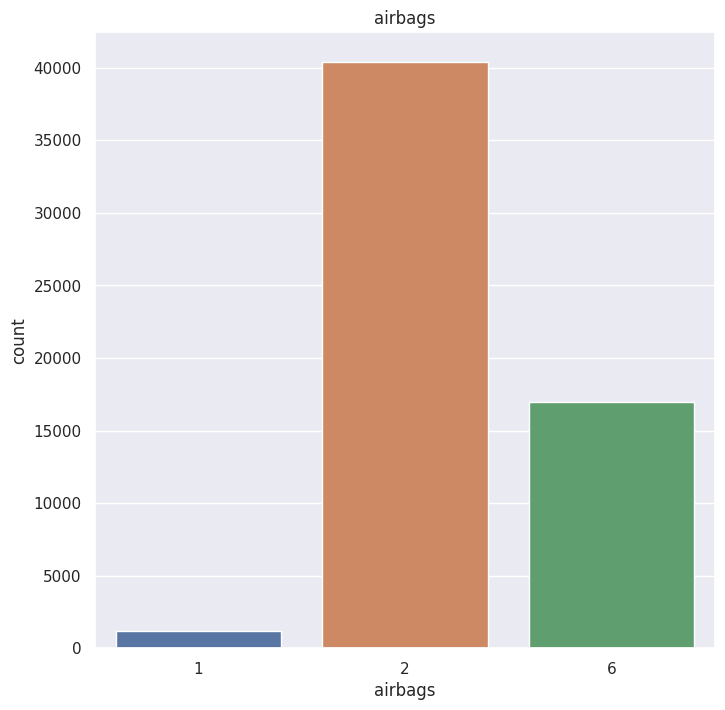

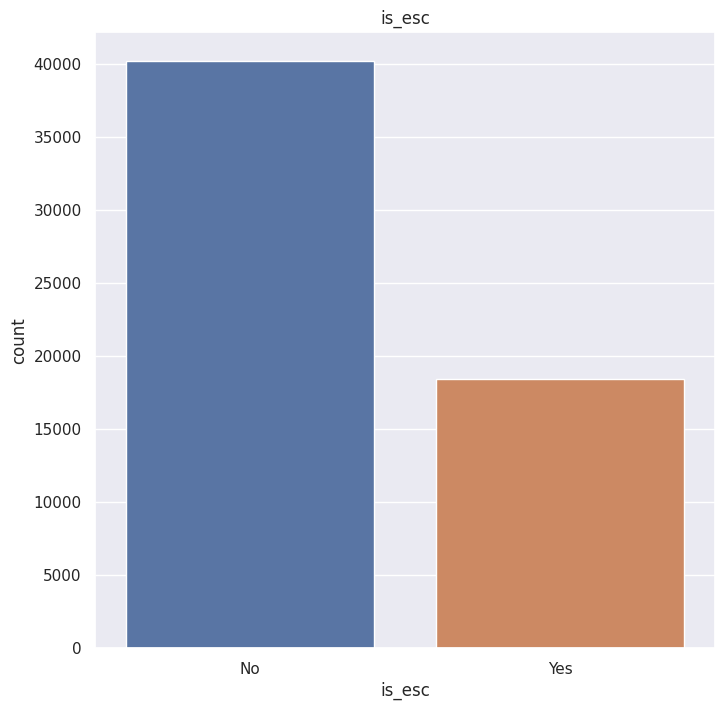

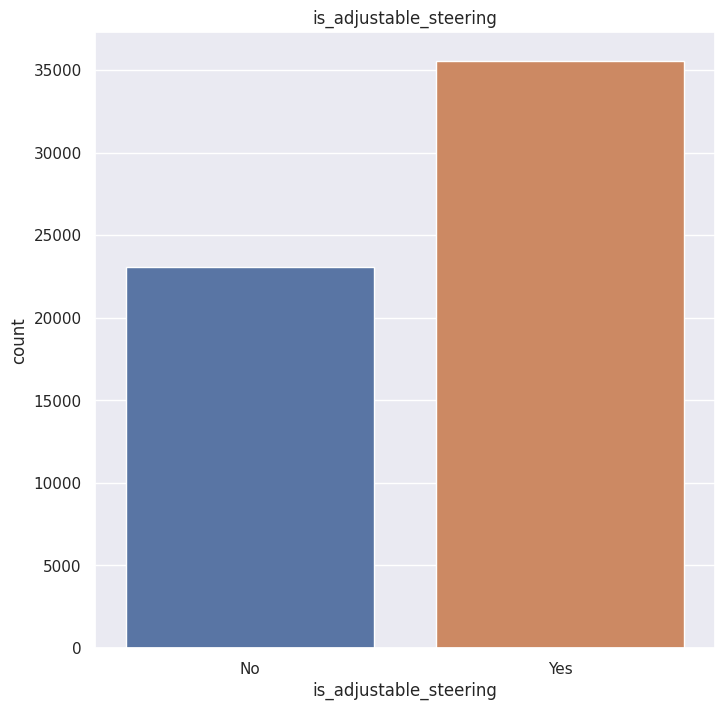

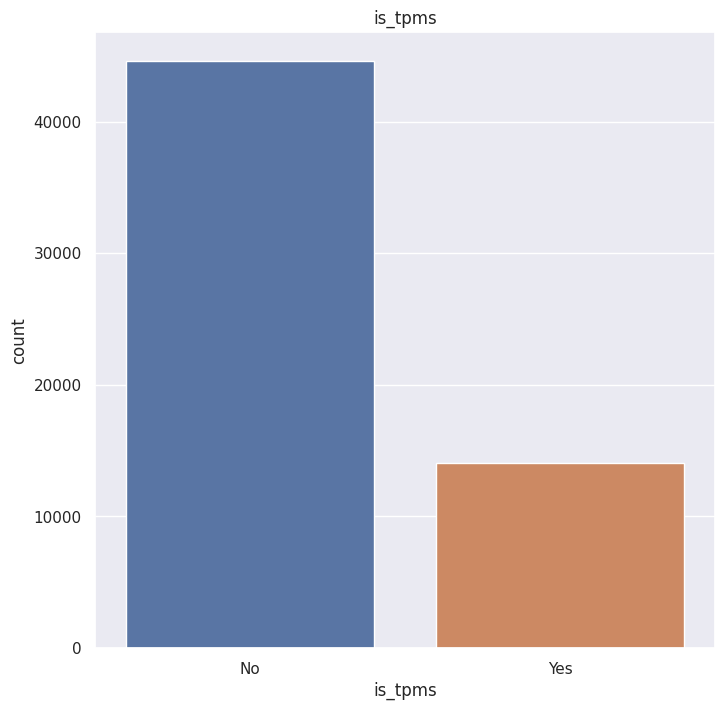

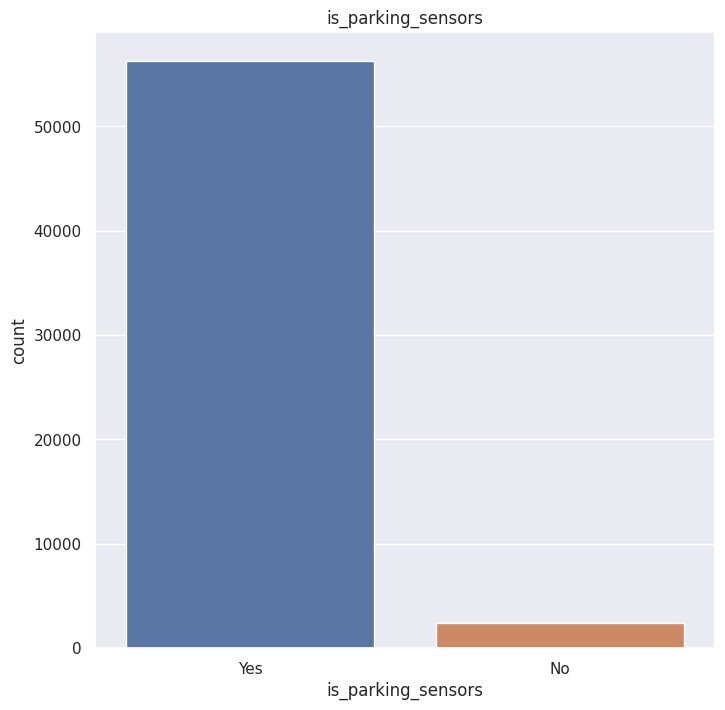

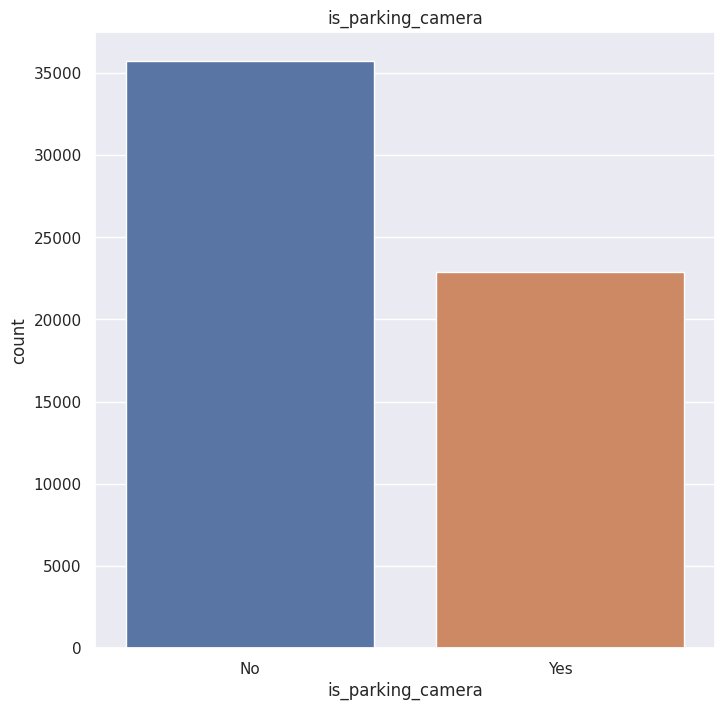

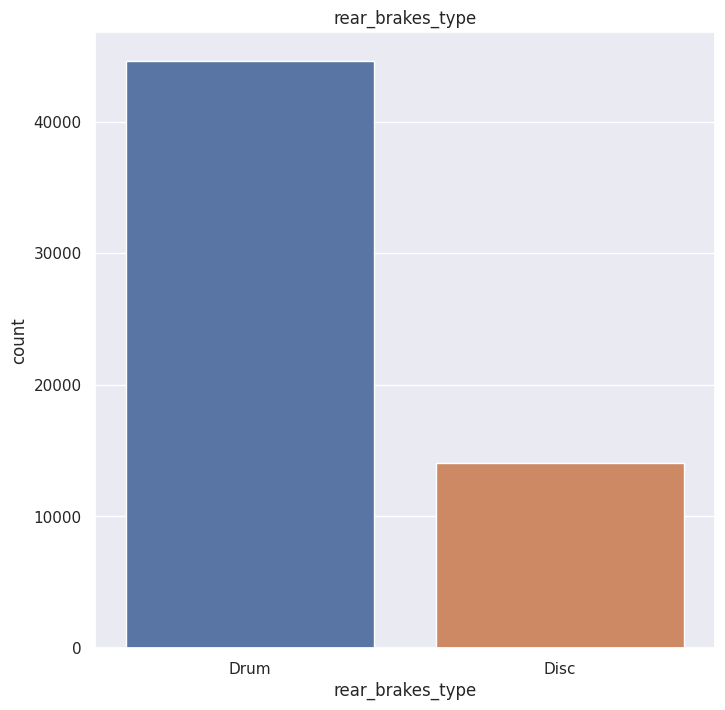

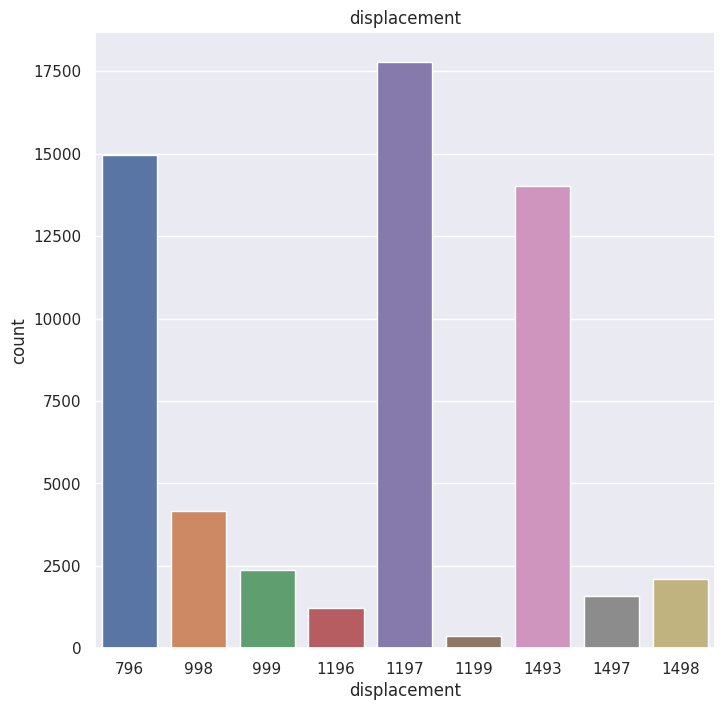

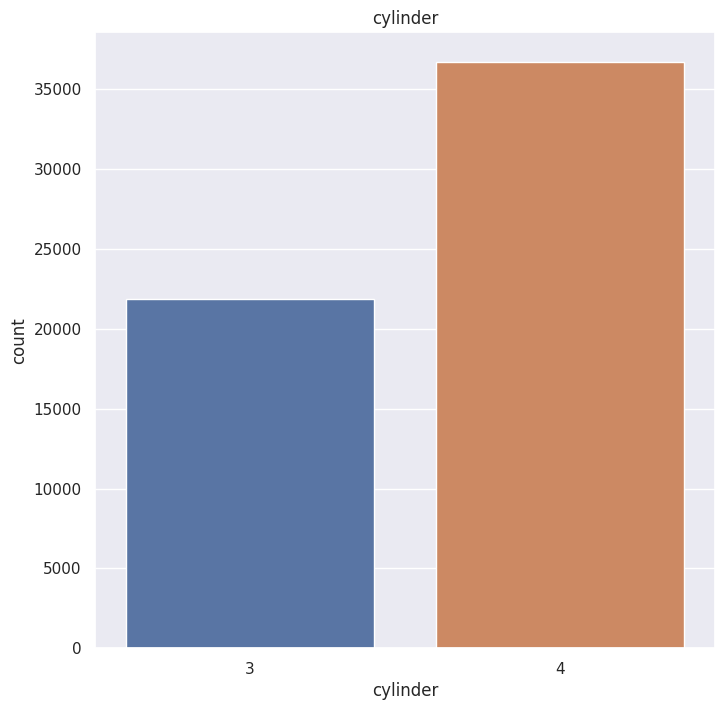

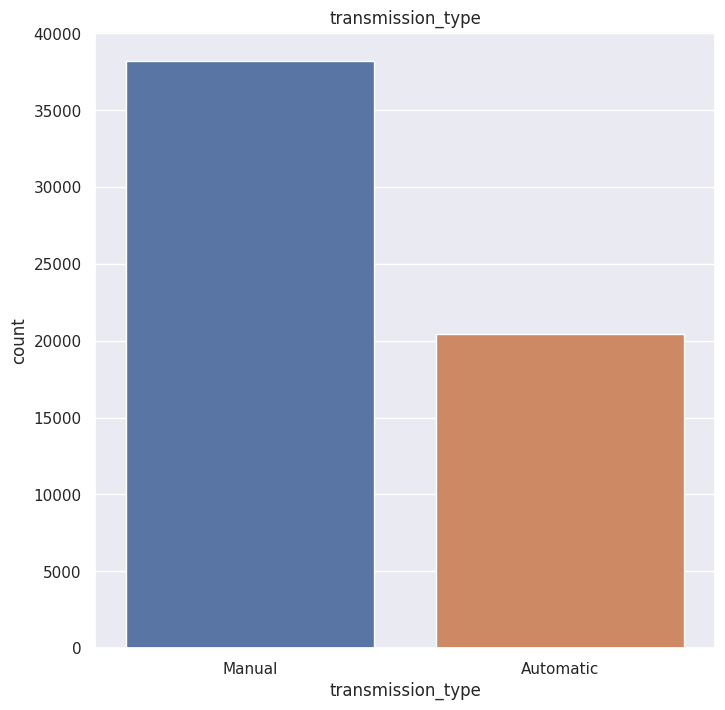

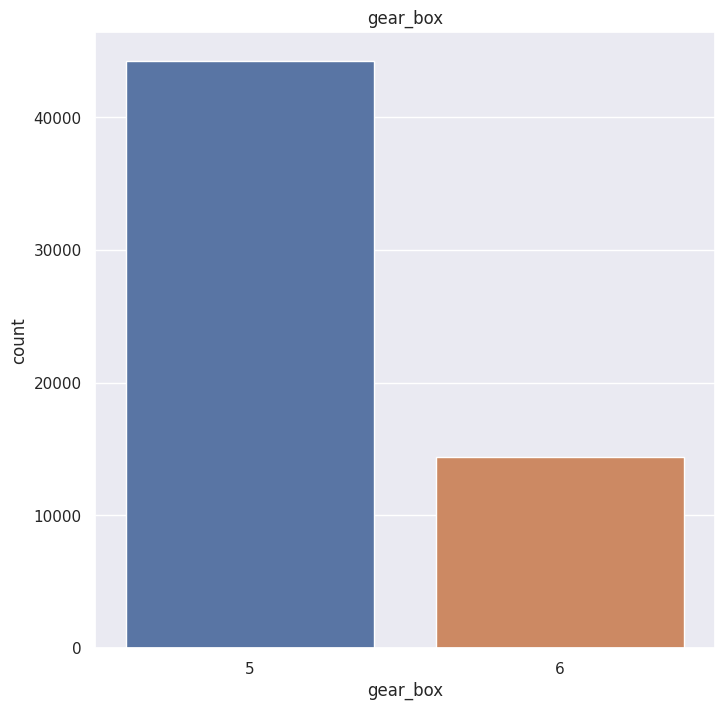

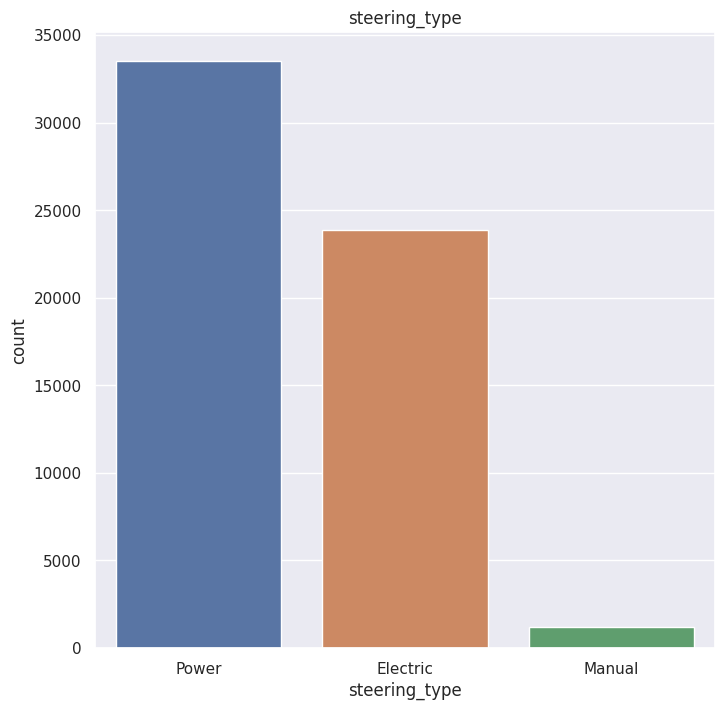

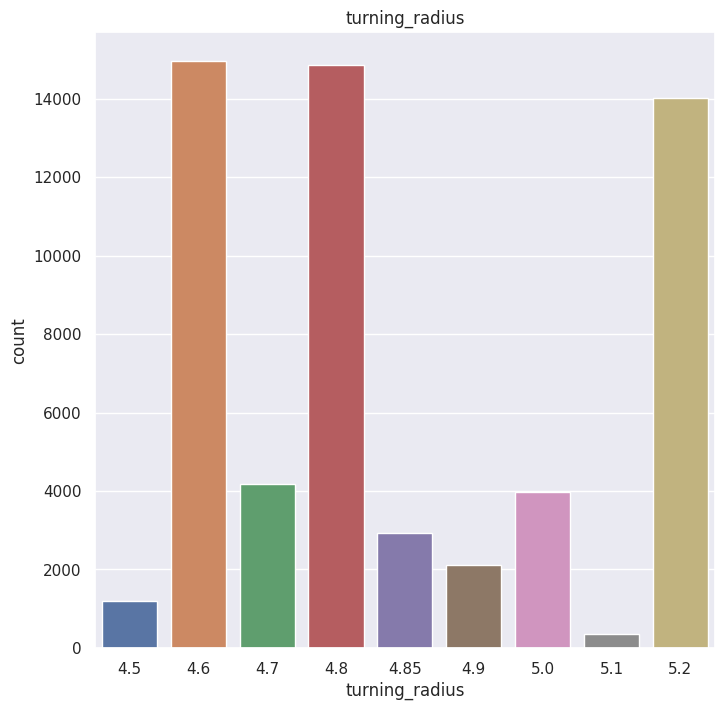

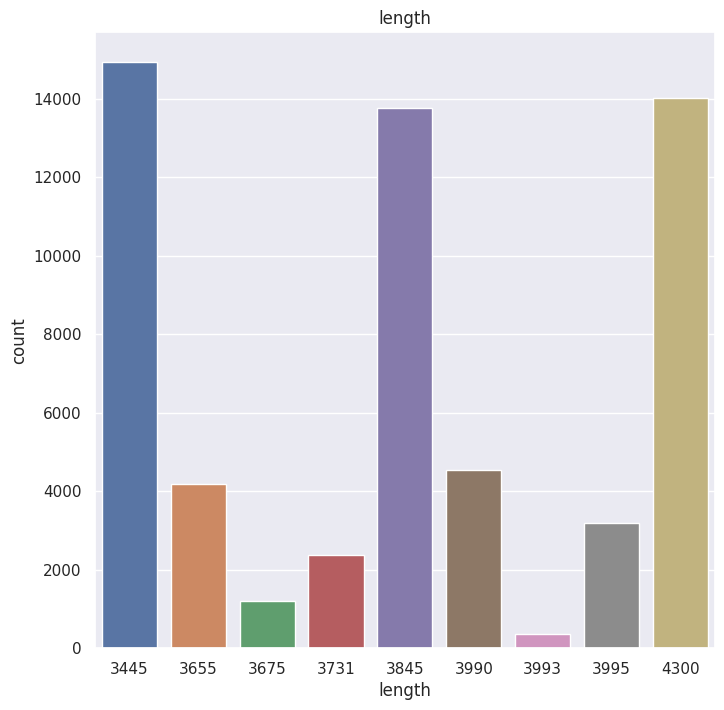

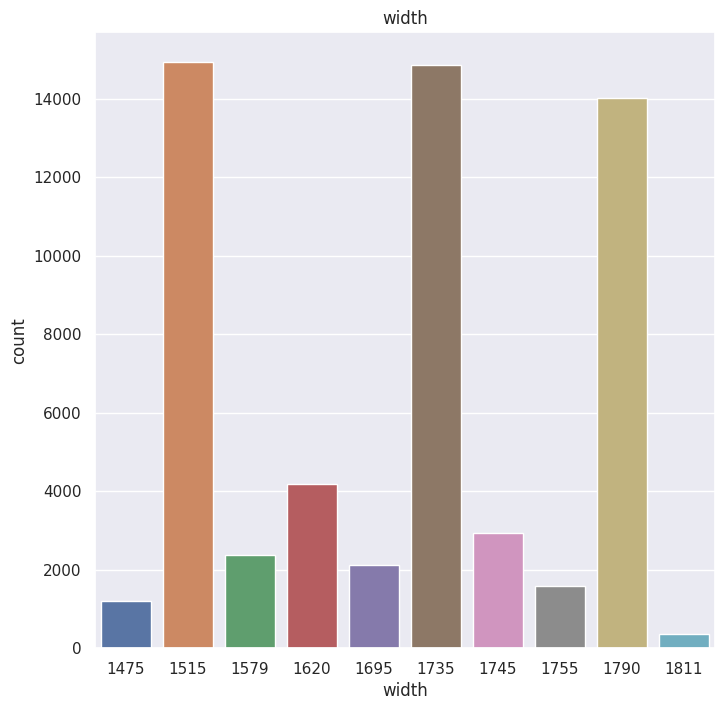

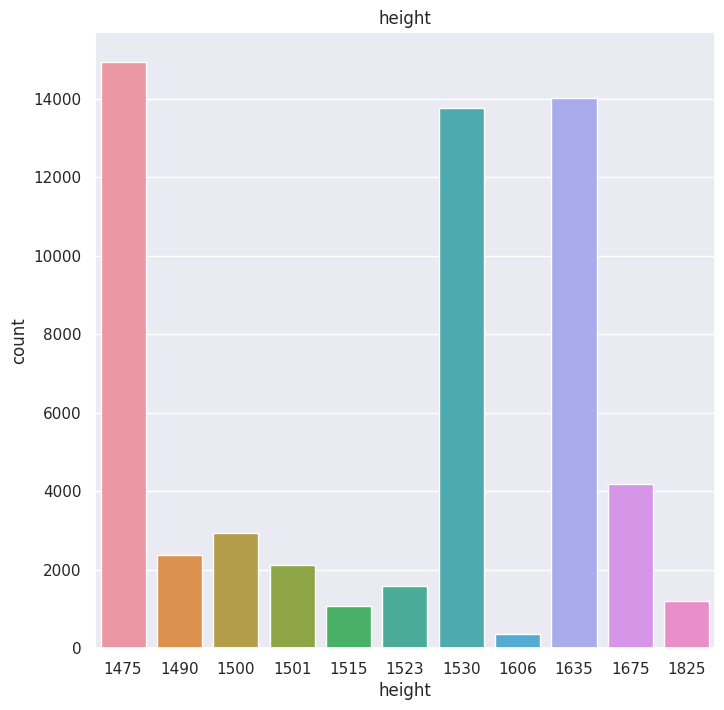

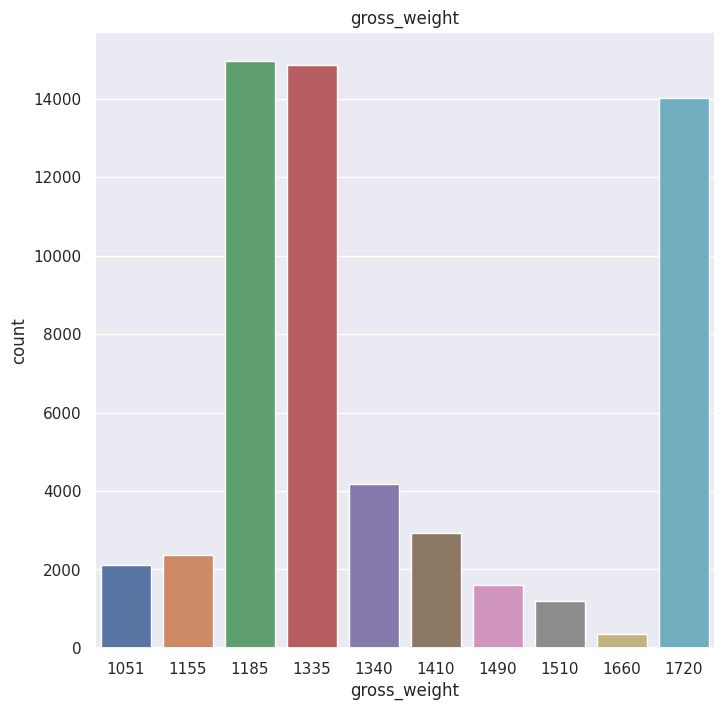

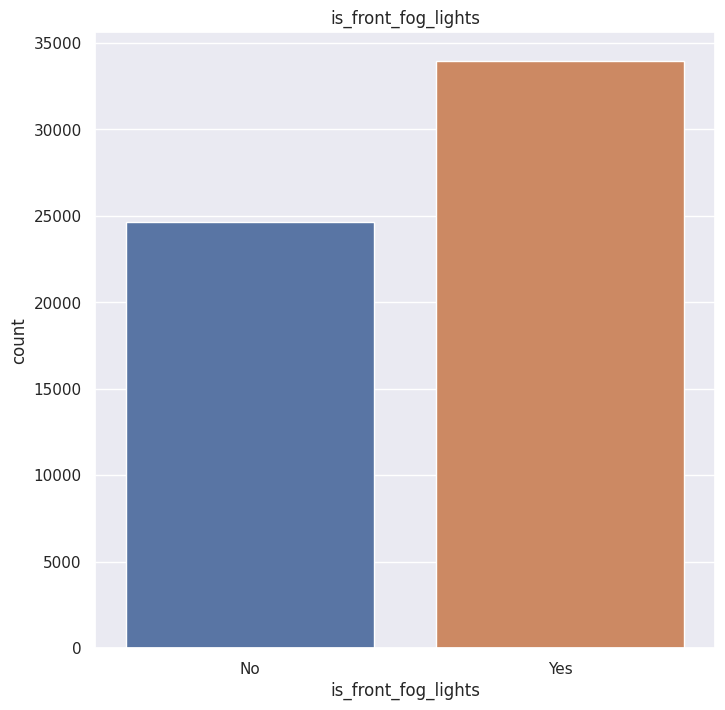

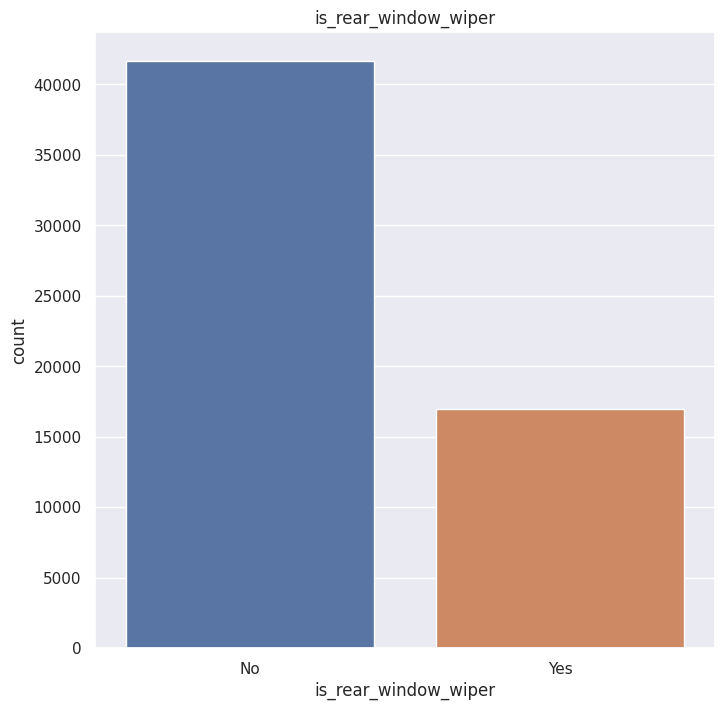

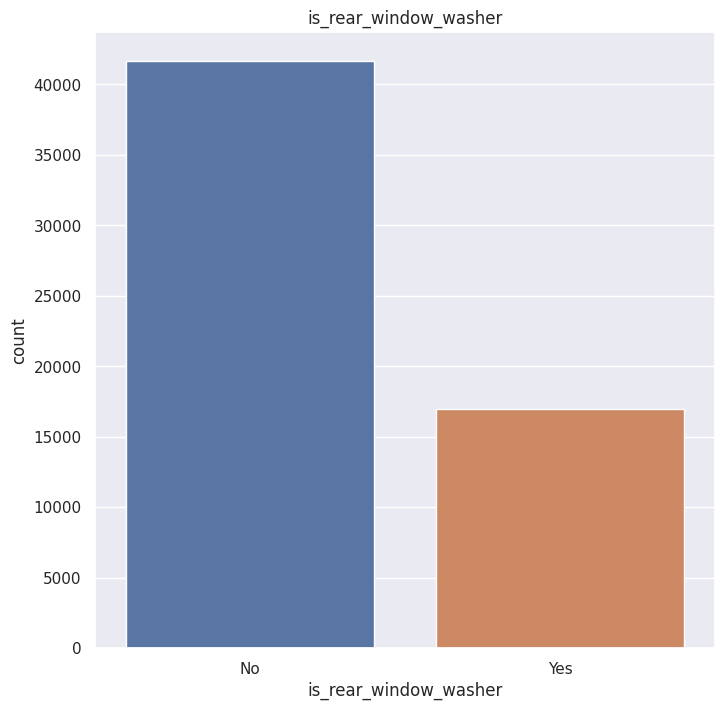

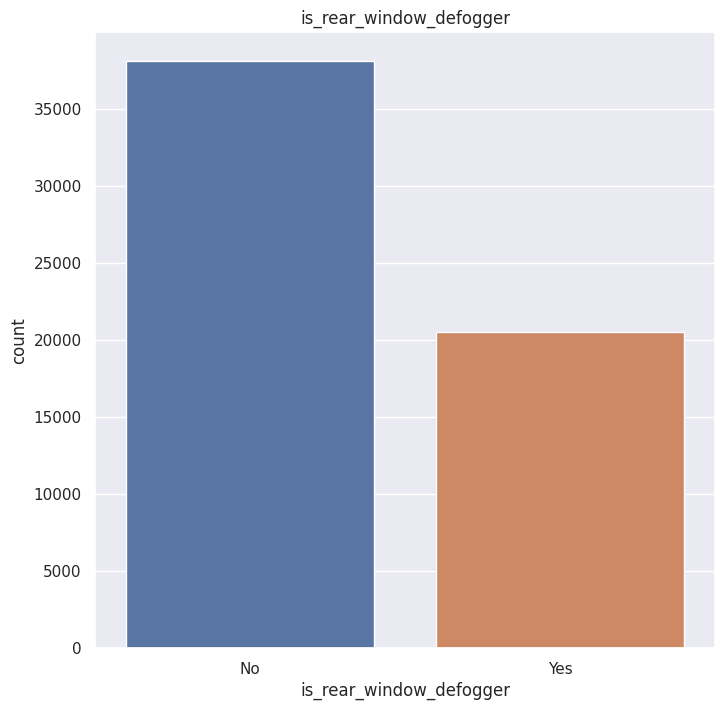

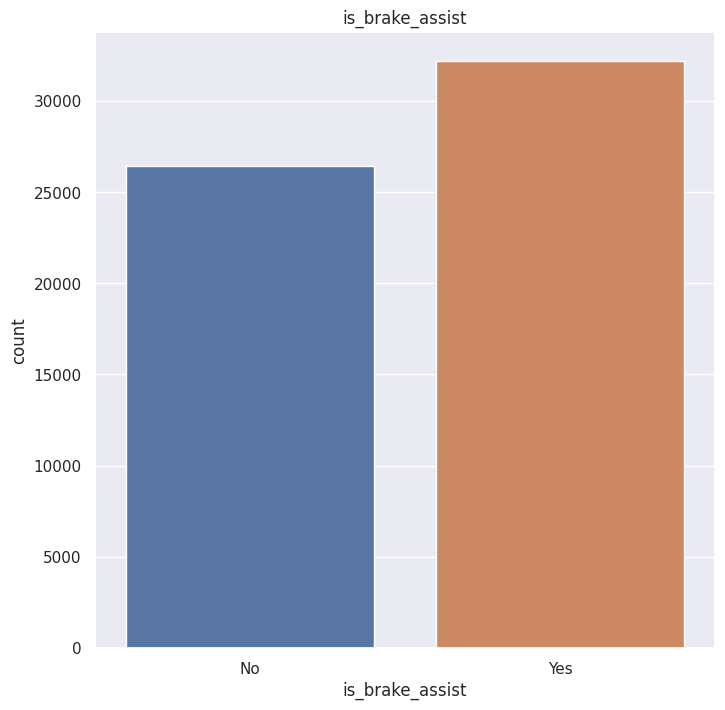

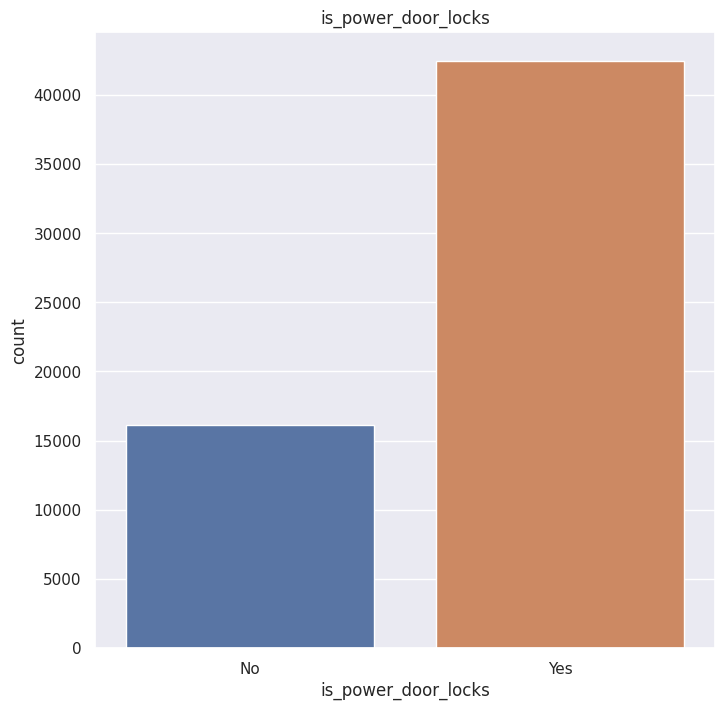

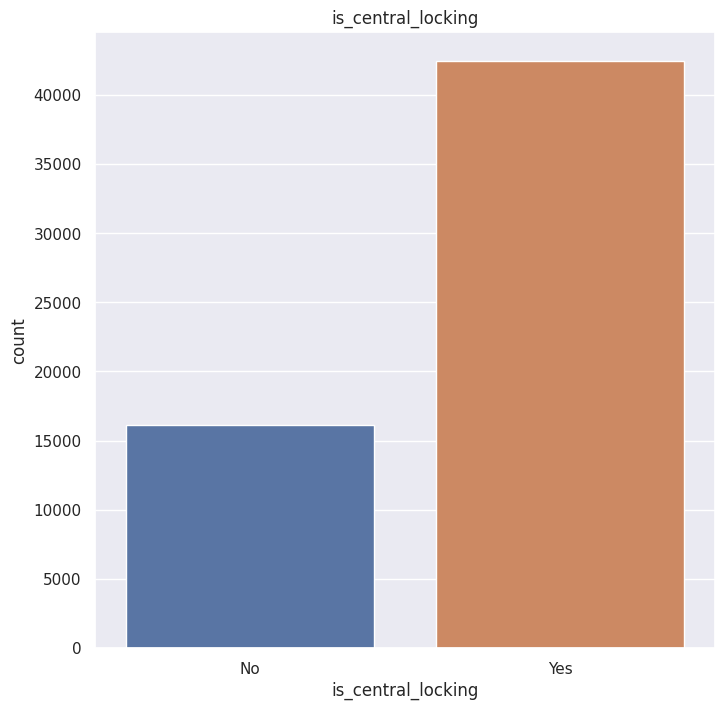

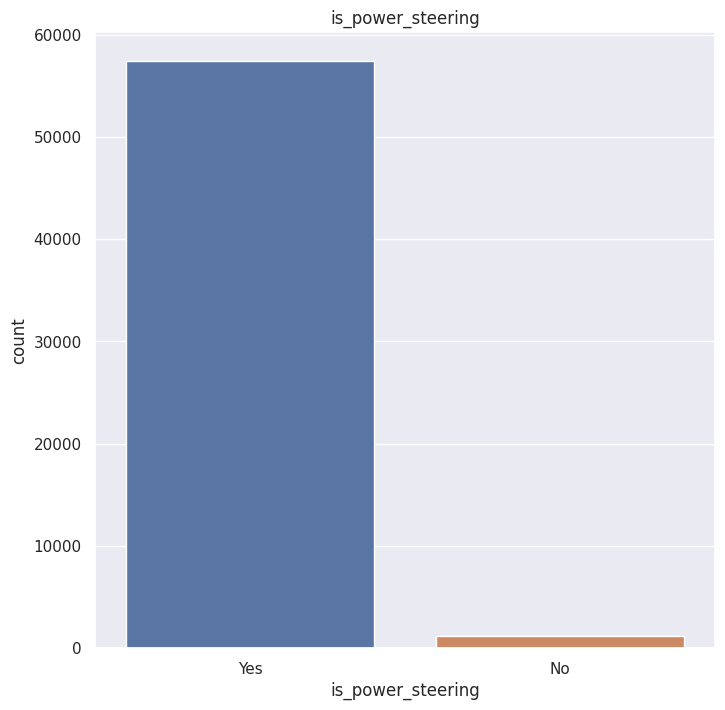

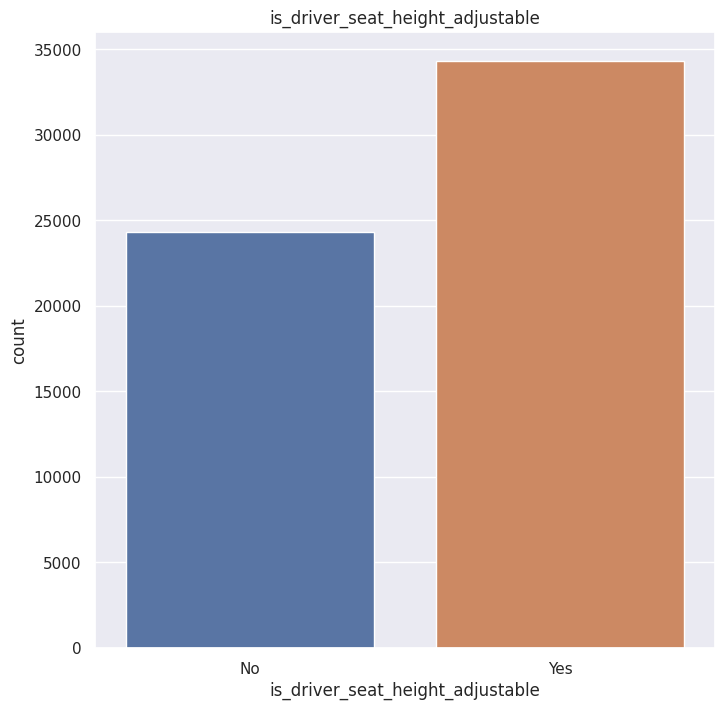

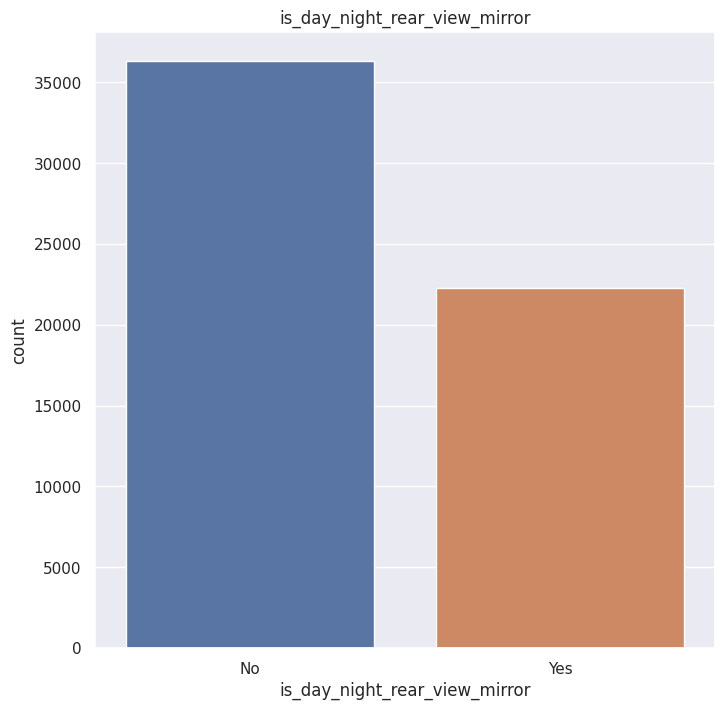

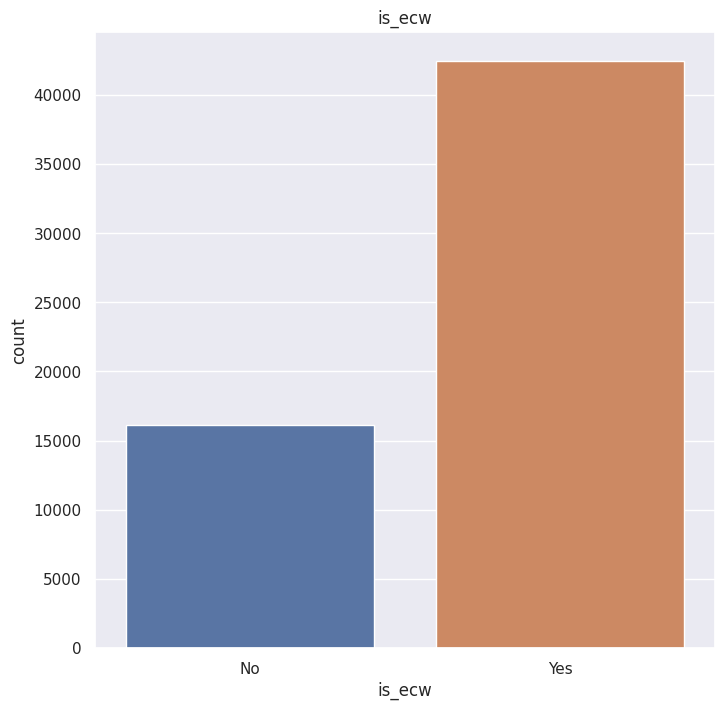

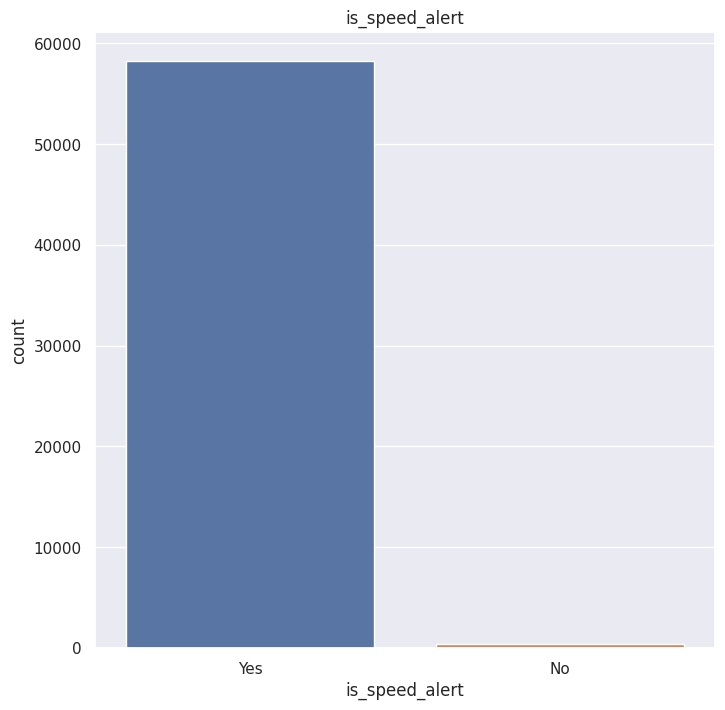

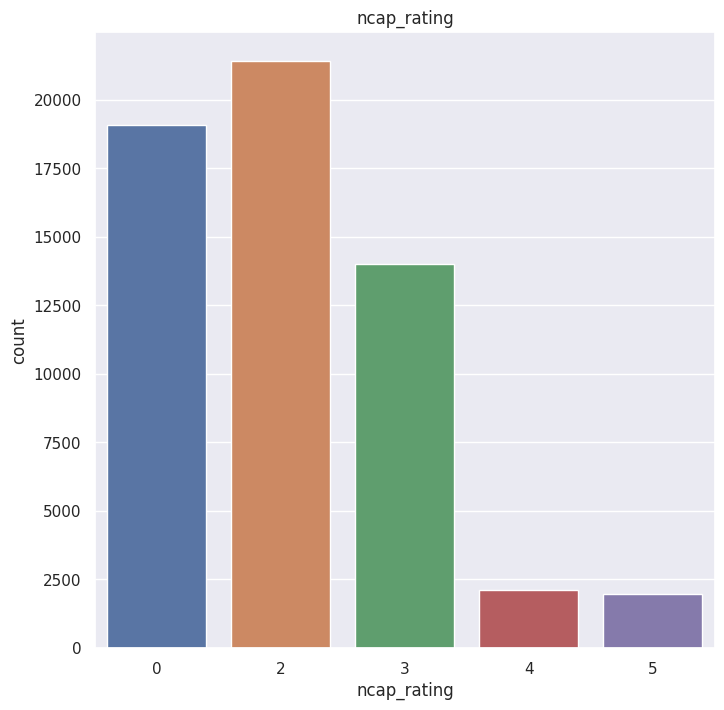

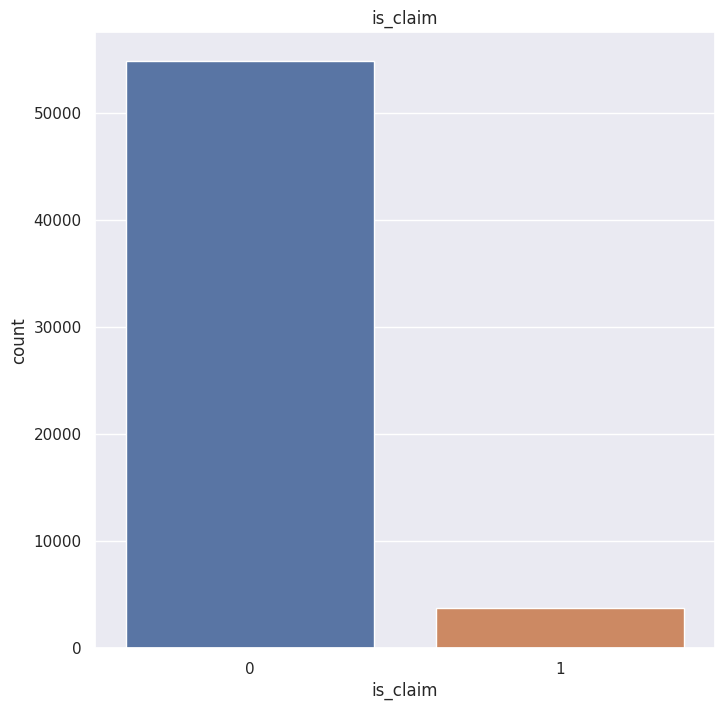

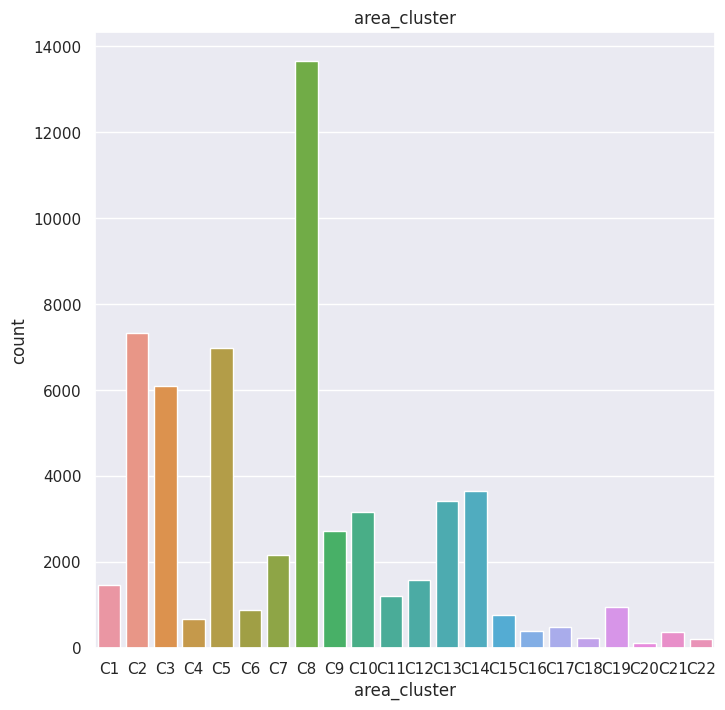

In [ ]:
for i in categ_list:
  plt.figure(figsize = (8,8))
  sns.countplot(x= i, data = df.loc[:,categ_list])
  plt.title(i)

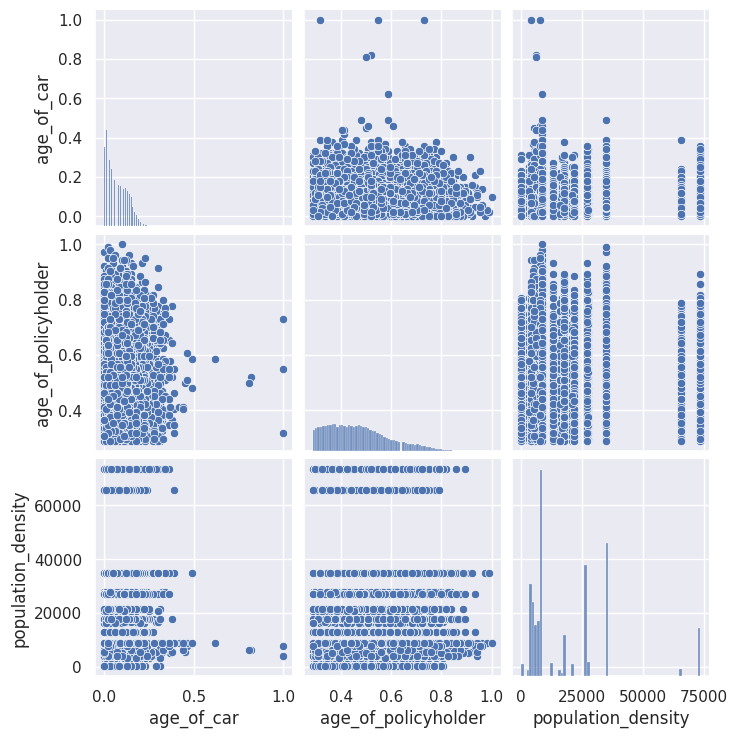

In [ ]:
sns.pairplot(df.loc[:,numer_list]);

array([[<Axes: title={'center': 'age_of_car'}>,
        <Axes: title={'center': 'age_of_policyholder'}>,
        <Axes: title={'center': 'population_density'}>,
        <Axes: title={'center': 'make'}>],
       [<Axes: title={'center': 'airbags'}>,
        <Axes: title={'center': 'displacement'}>,
        <Axes: title={'center': 'cylinder'}>,
        <Axes: title={'center': 'gear_box'}>],
       [<Axes: title={'center': 'turning_radius'}>,
        <Axes: title={'center': 'length'}>,
        <Axes: title={'center': 'width'}>,
        <Axes: title={'center': 'height'}>],
       [<Axes: title={'center': 'gross_weight'}>,
        <Axes: title={'center': 'ncap_rating'}>,
        <Axes: title={'center': 'is_claim'}>, <Axes: >]], dtype=object)

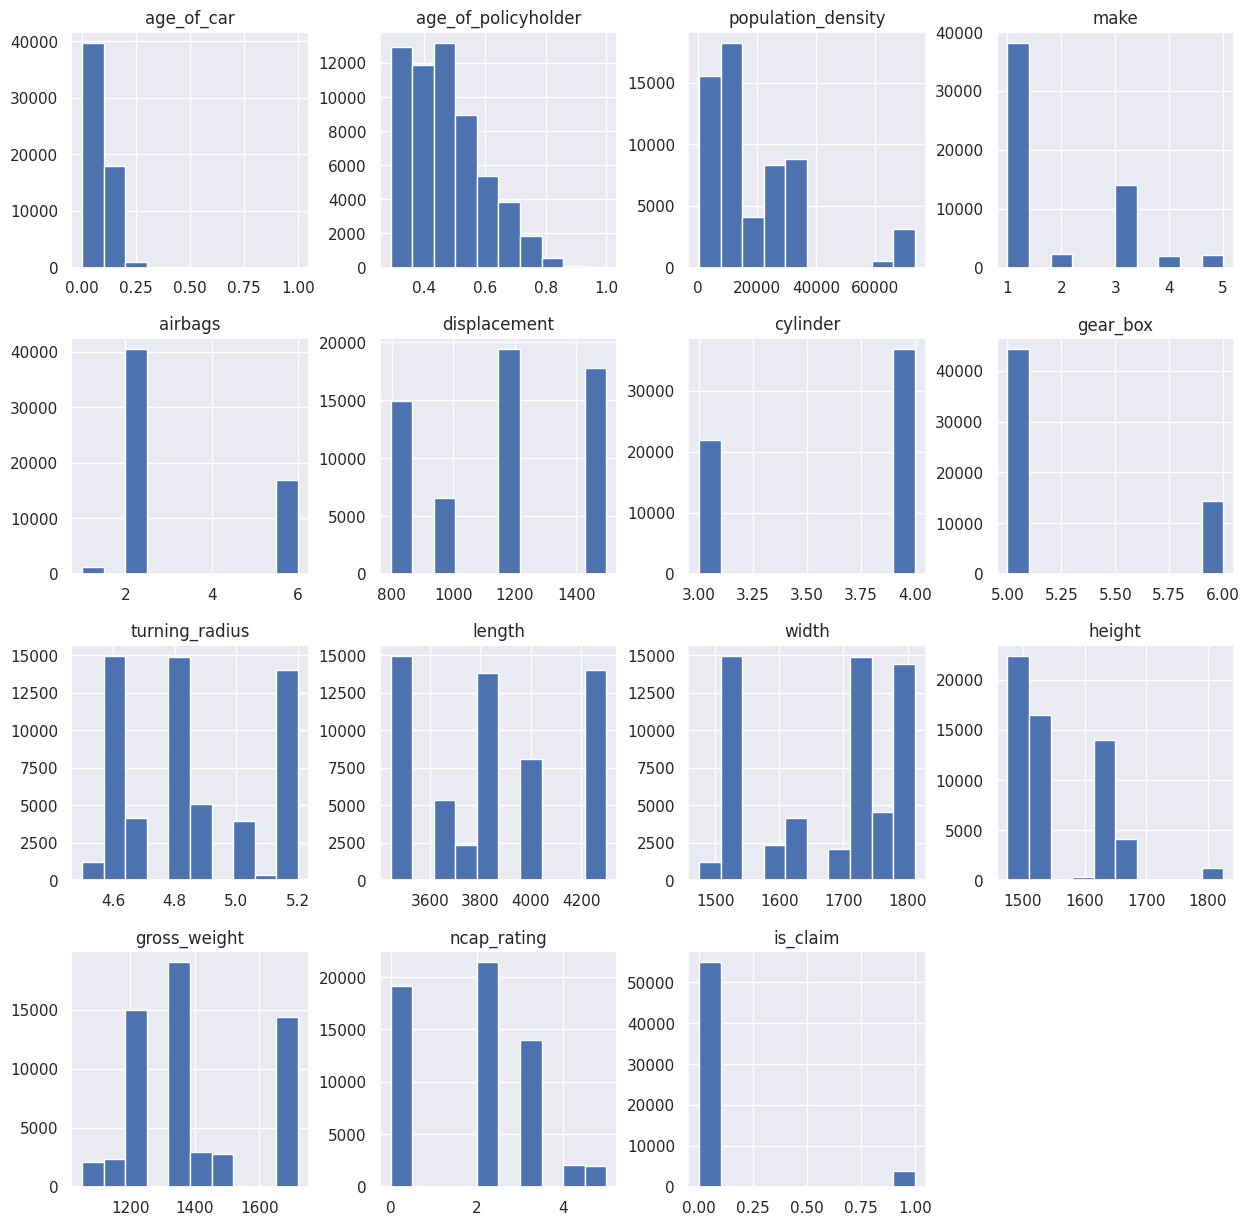

In [ ]:
df.hist(figsize=(15,15))

In [ ]:
df.nunique()

policy_id                           58592
age_of_car                             49
age_of_policyholder                    75
area_cluster                           22
population_density                     22
make                                    5
segment                                 6
model                                  11
fuel_type                               3
max_torque                              9
max_power                               9
engine_type                            11
airbags                                 3
is_esc                                  2
is_adjustable_steering                  2
is_tpms                                 2
is_parking_sensors                      2
is_parking_camera                       2
rear_brakes_type                        2
displacement                            9
cylinder                                2
transmission_type                       2
gear_box                                2
steering_type                     

In [ ]:
df.select_dtypes("object")

,policy_id,area_cluster,segment,model,fuel_type,max_torque,max_power,engine_type,is_esc,is_adjustable_steering,...,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
0,ID00001,C1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
1,ID00002,C2,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
2,ID00003,C3,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
3,ID00004,C4,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,Yes,Yes,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
4,ID00005,C5,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,No,No,...,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,ID58588,C8,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,No,No,...,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes
58588,ID58589,C14,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
58589,ID58590,C5,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
58590,ID58591,C8,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,No,Yes,...,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


Using label encoder to convert categorical values to numeric type
LABEL ENCODING**

---



In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


df['area_cluster'] = le.fit_transform(df['area_cluster'])
df['segment'] = le.fit_transform(df['segment'])
df['model'] = le.fit_transform(df['model'])
df['fuel_type'] = le.fit_transform(df['fuel_type'])
df['max_torque'] = le.fit_transform(df['max_torque'])
df['max_power'] = le.fit_transform(df['max_power'])
df['engine_type'] =le.fit_transform(df['engine_type'])
df['transmission_type'] = le.fit_transform(df['transmission_type'])







In [ ]:
df.head(2)

,policy_id,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.05,0.644231,0,4990,1,0,0,0,5,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.02,0.375000,11,27003,1,0,0,0,5,...,No,No,No,Yes,No,No,No,Yes,0,0


doing One hot encoding for the rest
OneHOT ENCODER

---



In [ ]:
df = pd.get_dummies(df, columns=['is_esc','is_adjustable_steering',
                                                   'is_tpms','is_parking_sensors','is_parking_camera','rear_brakes_type',
                                                   'steering_type','is_front_fog_lights','is_rear_window_wiper',
                                                   'is_rear_window_washer','is_rear_window_defogger','is_brake_assist','is_power_door_locks',
                                                   'is_central_locking','is_power_steering','is_driver_seat_height_adjustable',
                                                   'is_day_night_rear_view_mirror','is_ecw','is_speed_alert'] )

In [ ]:
df.head(2)

,policy_id,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_power_steering_No,is_power_steering_Yes,is_driver_seat_height_adjustable_No,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_No,is_day_night_rear_view_mirror_Yes,is_ecw_No,is_ecw_Yes,is_speed_alert_No,is_speed_alert_Yes
0,ID00001,0.05,0.644231,0,4990,1,0,0,0,5,...,0,1,1,0,1,0,1,0,0,1
1,ID00002,0.02,0.375000,11,27003,1,0,0,0,5,...,0,1,1,0,1,0,1,0,0,1


Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_columns = ['age_of_car', 'age_of_policyholder','population_density']
df[scaler_columns] = scaler.fit_transform(df[scaler_columns])

In [ ]:
df.head(2)

,policy_id,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_power_steering_No,is_power_steering_Yes,is_driver_seat_height_adjustable_No,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_No,is_day_night_rear_view_mirror_Yes,is_ecw_No,is_ecw_Yes,is_speed_alert_No,is_speed_alert_Yes
0,ID00001,-0.342447,1.422557,0,-0.783513,1,0,0,0,5,...,0,1,1,0,1,0,1,0,0,1
1,ID00002,-0.871359,-0.768362,11,0.462975,1,0,0,0,5,...,0,1,1,0,1,0,1,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 63 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   policy_id                             58592 non-null  object 
 1   age_of_car                            58592 non-null  float64
 2   age_of_policyholder                   58592 non-null  float64
 3   area_cluster                          58592 non-null  int64  
 4   population_density                    58592 non-null  float64
 5   make                                  58592 non-null  int64  
 6   segment                               58592 non-null  int64  
 7   model                                 58592 non-null  int64  
 8   fuel_type                             58592 non-null  int64  
 9   max_torque                            58592 non-null  int64  
 10  max_power                             58592 non-null  int64  
 11  engine_type    

Pandas profiling

---



In [ ]:
!pip install pandas-profiling

In [ ]:
import pandas_profiling

In [ ]:
profile = pandas_profiling.ProfileReport(df)
profile.to_file(output_file = 'insurance_claim.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Dtale

In [ ]:
!pip install dtale

In [ ]:
import dtale
import dtale.app as dtale_app
dtale_app.USE_COLAB = True

In [ ]:
d= dtale.show(df)

In [ ]:
d

https://4cldji2f4qk-496ff2e9c6d22116-40000-colab.googleusercontent.com/dtale/main/2

In [ ]:
#df['is_power_steering'] = df['is_power_steering'].replace({'Yes' :1 , 'No':0})

In [ ]:
#df['is_ecw'] = df['is_ecw'].replace({'Yes' :1 , 'No':0})

In [ ]:
df['is_claim'].value_counts()/(len(df))*100

0    93.603222
1     6.396778
Name: is_claim, dtype: float64

In [ ]:
df.head()

,policy_id,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_power_steering_No,is_power_steering_Yes,is_driver_seat_height_adjustable_No,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_No,is_day_night_rear_view_mirror_Yes,is_ecw_No,is_ecw_Yes,is_speed_alert_No,is_speed_alert_Yes
0,ID00001,-0.342447,1.422557,0,-0.783513,1,0,0,0,5,...,0,1,1,0,1,0,1,0,0,1
1,ID00002,-0.871359,-0.768362,11,0.462975,1,0,0,0,5,...,0,1,1,0,1,0,1,0,0,1
2,ID00003,-0.871359,-0.690115,15,-0.835268,1,0,0,0,5,...,0,1,1,0,1,0,1,0,0,1
3,ID00004,0.715378,-0.298879,16,0.158275,1,3,3,2,0,...,0,1,0,1,0,1,0,1,0,1
4,ID00005,0.715378,1.344310,17,0.900969,2,0,4,2,8,...,0,1,1,0,0,1,0,1,0,1


In [ ]:
df.columns

Index(['policy_id', 'age_of_car', 'age_of_policyholder', 'area_cluster',
       'population_density', 'make', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'airbags', 'displacement',
       'cylinder', 'transmission_type', 'gear_box', 'turning_radius', 'length',
       'width', 'height', 'gross_weight', 'ncap_rating', 'is_claim',
       'is_esc_No', 'is_esc_Yes', 'is_adjustable_steering_No',
       'is_adjustable_steering_Yes', 'is_tpms_No', 'is_tpms_Yes',
       'is_parking_sensors_No', 'is_parking_sensors_Yes',
       'is_parking_camera_No', 'is_parking_camera_Yes',
       'rear_brakes_type_Disc', 'rear_brakes_type_Drum',
       'steering_type_Electric', 'steering_type_Manual', 'steering_type_Power',
       'is_front_fog_lights_No', 'is_front_fog_lights_Yes',
       'is_rear_window_wiper_No', 'is_rear_window_wiper_Yes',
       'is_rear_window_washer_No', 'is_rear_window_washer_Yes',
       'is_rear_window_defogger_No', 'is_rear_window_defogger_Yes'

Splitting data into independent and dependent variables

In [ ]:
x = df.drop(['policy_id', 'is_claim'], axis =1)
y = df['is_claim']


In [ ]:
x.head()

,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,...,is_power_steering_No,is_power_steering_Yes,is_driver_seat_height_adjustable_No,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_No,is_day_night_rear_view_mirror_Yes,is_ecw_No,is_ecw_Yes,is_speed_alert_No,is_speed_alert_Yes
0,-0.342447,1.422557,0,-0.783513,1,0,0,0,5,2,...,0,1,1,0,1,0,1,0,0,1
1,-0.871359,-0.768362,11,0.462975,1,0,0,0,5,2,...,0,1,1,0,1,0,1,0,0,1
2,-0.871359,-0.690115,15,-0.835268,1,0,0,0,5,2,...,0,1,1,0,1,0,1,0,0,1
3,0.715378,-0.298879,16,0.158275,1,3,3,2,0,6,...,0,1,0,1,0,1,0,1,0,1
4,0.715378,1.344310,17,0.900969,2,0,4,2,8,5,...,0,1,1,0,0,1,0,1,0,1


In [ ]:
x.shape

(58592, 61)

In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_claim, dtype: int64

In [ ]:
y.shape

(58592,)

In [ ]:
y.value_counts()

0    54844
1     3748
Name: is_claim, dtype: int64

There is class imbalance in y .So we use smote technique

In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x,y)
print(y.value_counts())
print()
print(y_smote.value_counts())

0    54844
1     3748
Name: is_claim, dtype: int64

0    54844
1    54844
Name: is_claim, dtype: int64


In [ ]:
print(x.shape)

(58592, 61)


In [ ]:
print(x_smote.shape)

(109688, 61)


In [ ]:
print(y.shape)

(58592,)


In [ ]:
print(y_smote.shape)

(109688,)


now there is no imbalances

Split data to train and test refer hr_analytics,telecomm

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =  train_test_split(x_smote, y_smote,test_size = 0.2, random_state =101)

In [ ]:
#!pip install bamboolib

**Logistic** **Regression**

---



In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logit = LogisticRegression()
logit.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_predit_logit_train = logit.predict(x_train)
y_predit_logit_test = logit.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
print(classification_report(y_train, y_predit_logit_train))
print("*************************************************"*10)
print(classification_report(y_test, y_predit_logit_test))

              precision    recall  f1-score   support

           0       0.54      0.54      0.54     43918
           1       0.54      0.54      0.54     43832

    accuracy                           0.54     87750
   macro avg       0.54      0.54      0.54     87750
weighted avg       0.54      0.54      0.54     87750

**********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************
              precision    recall  f1-score   support

           0       0.53      0.55      0.54     10926
           1       0.54      0.53      0.53     11012

    accuracy      

In [ ]:
print(accuracy_score(y_train, y_predit_logit_train))
print("**********************************************"*10)
print(accuracy_score(y_test, y_predit_logit_test))

0.5403418803418804
****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************
0.5360561582641991


In [ ]:
df.columns

Index(['policy_id', 'age_of_car', 'age_of_policyholder', 'area_cluster',
       'population_density', 'make', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'airbags', 'displacement',
       'cylinder', 'transmission_type', 'gear_box', 'turning_radius', 'length',
       'width', 'height', 'gross_weight', 'ncap_rating', 'is_claim',
       'is_esc_No', 'is_esc_Yes', 'is_adjustable_steering_No',
       'is_adjustable_steering_Yes', 'is_tpms_No', 'is_tpms_Yes',
       'is_parking_sensors_No', 'is_parking_sensors_Yes',
       'is_parking_camera_No', 'is_parking_camera_Yes',
       'rear_brakes_type_Disc', 'rear_brakes_type_Drum',
       'steering_type_Electric', 'steering_type_Manual', 'steering_type_Power',
       'is_front_fog_lights_No', 'is_front_fog_lights_Yes',
       'is_rear_window_wiper_No', 'is_rear_window_wiper_Yes',
       'is_rear_window_washer_No', 'is_rear_window_washer_Yes',
       'is_rear_window_defogger_No', 'is_rear_window_defogger_Yes'

In [ ]:
df['policy_id'].value_counts()

ID00001    1
ID39053    1
ID39055    1
ID39056    1
ID39057    1
          ..
ID19535    1
ID19536    1
ID19537    1
ID19538    1
ID58592    1
Name: policy_id, Length: 58592, dtype: int64

In [ ]:
x_test.columns

Index(['age_of_car', 'age_of_policyholder', 'area_cluster',
       'population_density', 'make', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'airbags', 'displacement',
       'cylinder', 'transmission_type', 'gear_box', 'turning_radius', 'length',
       'width', 'height', 'gross_weight', 'ncap_rating', 'is_esc_No',
       'is_esc_Yes', 'is_adjustable_steering_No', 'is_adjustable_steering_Yes',
       'is_tpms_No', 'is_tpms_Yes', 'is_parking_sensors_No',
       'is_parking_sensors_Yes', 'is_parking_camera_No',
       'is_parking_camera_Yes', 'rear_brakes_type_Disc',
       'rear_brakes_type_Drum', 'steering_type_Electric',
       'steering_type_Manual', 'steering_type_Power', 'is_front_fog_lights_No',
       'is_front_fog_lights_Yes', 'is_rear_window_wiper_No',
       'is_rear_window_wiper_Yes', 'is_rear_window_washer_No',
       'is_rear_window_washer_Yes', 'is_rear_window_defogger_No',
       'is_rear_window_defogger_Yes', 'is_brake_assist_No',
 

In [ ]:
df['probability1'] = logit.predict_proba(df[x_test.columns])[:,0]

In [ ]:
df

,policy_id,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_power_steering_Yes,is_driver_seat_height_adjustable_No,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_No,is_day_night_rear_view_mirror_Yes,is_ecw_No,is_ecw_Yes,is_speed_alert_No,is_speed_alert_Yes,probability1
0,ID00001,-0.342447,1.422557,0,-0.783513,1,0,0,0,5,...,1,1,0,1,0,1,0,0,1,0.496929
1,ID00002,-0.871359,-0.768362,11,0.462975,1,0,0,0,5,...,1,1,0,1,0,1,0,0,1,0.535592
2,ID00003,-0.871359,-0.690115,15,-0.835268,1,0,0,0,5,...,1,1,0,1,0,1,0,0,1,0.503846
3,ID00004,0.715378,-0.298879,16,0.158275,1,3,3,2,0,...,1,0,1,0,1,0,1,0,1,0.533848
4,ID00005,0.715378,1.344310,17,0.900969,2,0,4,2,8,...,1,1,0,0,1,0,1,0,1,0.579975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,ID58588,1.067986,1.422557,20,-0.568111,2,0,4,2,8,...,1,1,0,0,1,0,1,0,1,0.563840
58588,ID58589,-0.871359,0.405345,5,-0.625076,1,0,0,0,5,...,1,1,0,1,0,1,0,0,1,0.491040
58589,ID58590,-0.342447,-0.142385,17,0.900969,1,0,0,0,5,...,1,1,0,1,0,1,0,0,1,0.556386
58590,ID58591,1.244290,0.718333,20,-0.568111,1,2,7,2,0,...,1,0,1,0,1,0,1,0,1,0.509231


Get the predicted probabilities for the positive class

---



In [ ]:
df['probability'] = logit.predict_proba(df[x_test.columns])[:,1]

In [ ]:
df[['policy_id', 'probability']].tail(20)

,policy_id,probability
58572,ID58573,0.358647
58573,ID58574,0.502215
58574,ID58575,0.531700
58575,ID58576,0.363801
58576,ID58577,0.608034
58577,ID58578,0.456465
58578,ID58579,0.445171
58579,ID58580,0.505259
58580,ID58581,0.467331
58581,ID58582,0.487270


In [ ]:
# Get the predicted probabilities for the positive class
y_pred_proba= logit.predict_proba(df[x_test.columns])[:, 1]
y_pred_proba

array([0.50307111, 0.46440812, 0.4961541 , ..., 0.44361362, 0.49076943,
       0.56259705])

In [ ]:
!pip install markupsafe==2.0.1

  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.3
    Uninstalling MarkupSafe-2.1.3:
      Successfully uninstalled MarkupSafe-2.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
werkzeug 2.2.3 requires MarkupSafe>=2.1.1, but you have markupsafe 2.0.1 which is incompatible.


In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 17.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 100.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 95.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 70.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 13.6 MB/s eta 0:

In [ ]:
#!pip install markupsafe==2.0.1

In [ ]:
import jinja2

In [ ]:
from pycaret.classification import *

In [ ]:
classification = setup(data = df, target = 'is_claim', session_id = 123)

,Description,Value
0,Session id,123
1,Target,is_claim
2,Target type,Binary
3,Original data shape,"(58592, 65)"
4,Transformed data shape,"(58592, 65)"
5,Transformed train set shape,"(41014, 65)"
6,Transformed test set shape,"(17578, 65)"
7,Numeric features,63
8,Categorical features,1
9,Preprocess,True


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.9360,0.5348,0.0000,0.0000,0.0000,0.0000,0.0000,0.2160
dt,Decision Tree Classifier,0.9360,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2190
ridge,Ridge Classifier,0.9360,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2180
rf,Random Forest Classifier,0.9360,0.4989,0.0000,0.0000,0.0000,0.0000,0.0000,1.9410
qda,Quadratic Discriminant Analysis,0.9360,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4330
ada,Ada Boost Classifier,0.9360,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2250
gbc,Gradient Boosting Classifier,0.9360,0.5026,0.0000,0.0000,0.0000,0.0000,0.0000,2.9050
lda,Linear Discriminant Analysis,0.9360,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4270
et,Extra Trees Classifier,0.9360,0.5036,0.0000,0.0000,0.0000,0.0000,0.0000,1.5790
xgboost,Extreme Gradient Boosting,0.9360,0.5405,0.0000,0.0000,0.0000,0.0000,0.0000,1.3110


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
logreg = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9356,0.5125,0.0000,0.0000,0.0000,-0.0005,-0.0041
1,0.9354,0.4979,0.0000,0.0000,0.0000,-0.0010,-0.0058
2,0.9359,0.5583,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9349,0.5505,0.0038,0.1667,0.0074,0.0046,0.0160
4,0.9298,0.4963,0.0000,0.0000,0.0000,-0.0117,-0.0209
5,0.9351,0.5114,0.0000,0.0000,0.0000,-0.0019,-0.0082
6,0.9354,0.4948,0.0000,0.0000,0.0000,-0.0014,-0.0071
7,0.9361,0.5361,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9325,0.5273,0.0000,0.0000,0.0000,-0.0070,-0.0158


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_logr = tune_model(logreg)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9359,0.5288,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9359,0.5040,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9359,0.5411,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9359,0.5664,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9361,0.5131,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9361,0.5224,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9361,0.5204,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9361,0.5494,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9361,0.5204,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
evaluate_model(tuned_logr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…